In [11]:
from temds.tile import Tile

from temds import downscalers
from temds import corrections

import matplotlib.pyplot as plt
import numpy as np

Manifest for tile: 7,16
```
index:
- 7
- 16
extent:
- -1678000.0
- -1402000.0
- 2915000.0
- 3315000.0
resolution: 4000
crs: PROJCRS["WGS 84 / NSIDC EASE-Grid 2.0 North",BASEGEOGCRS["WGS 84",ENSEMBLE["World
  Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World
  Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World
  Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World
  Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],MEMBER["World
  Geodetic System 1984 (G2296)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4326]],CONVERSION["US
  NSIDC EASE-Grid 2.0 North",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude
  of natural origin",90,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude
  of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["False
  easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["easting
  (X)",south,MERIDIAN[90,ANGLEUNIT["degree",0.0174532925199433]],ORDER[1],LENGTHUNIT["metre",1]],AXIS["northing
  (Y)",south,MERIDIAN[180,ANGLEUNIT["degree",0.0174532925199433]],ORDER[2],LENGTHUNIT["metre",1]],USAGE[SCOPE["Environmental
  science - used as basis for EASE grid."],AREA["Northern hemisphere."],BBOX[0,-180,90,180]],ID["EPSG",6931]]
buffer_px: 20
data:
  cru_AnnualTimeSeries: cru_AnnualTimeSeries
  cru_baseline: cru_baseline.nc
  worldclim: worldclim.nc
```

In [21]:
H, V = 7, 16

mytile = Tile.tile_from_directory(f'/media/rwspicer/data/V3/tem/03-tiles-testing/H{H:02d}_V{V:02d}/')
mytile

Tile: [7, 16] with data for: worldclim, cru_AnnualTimeSeries, cru_baseline

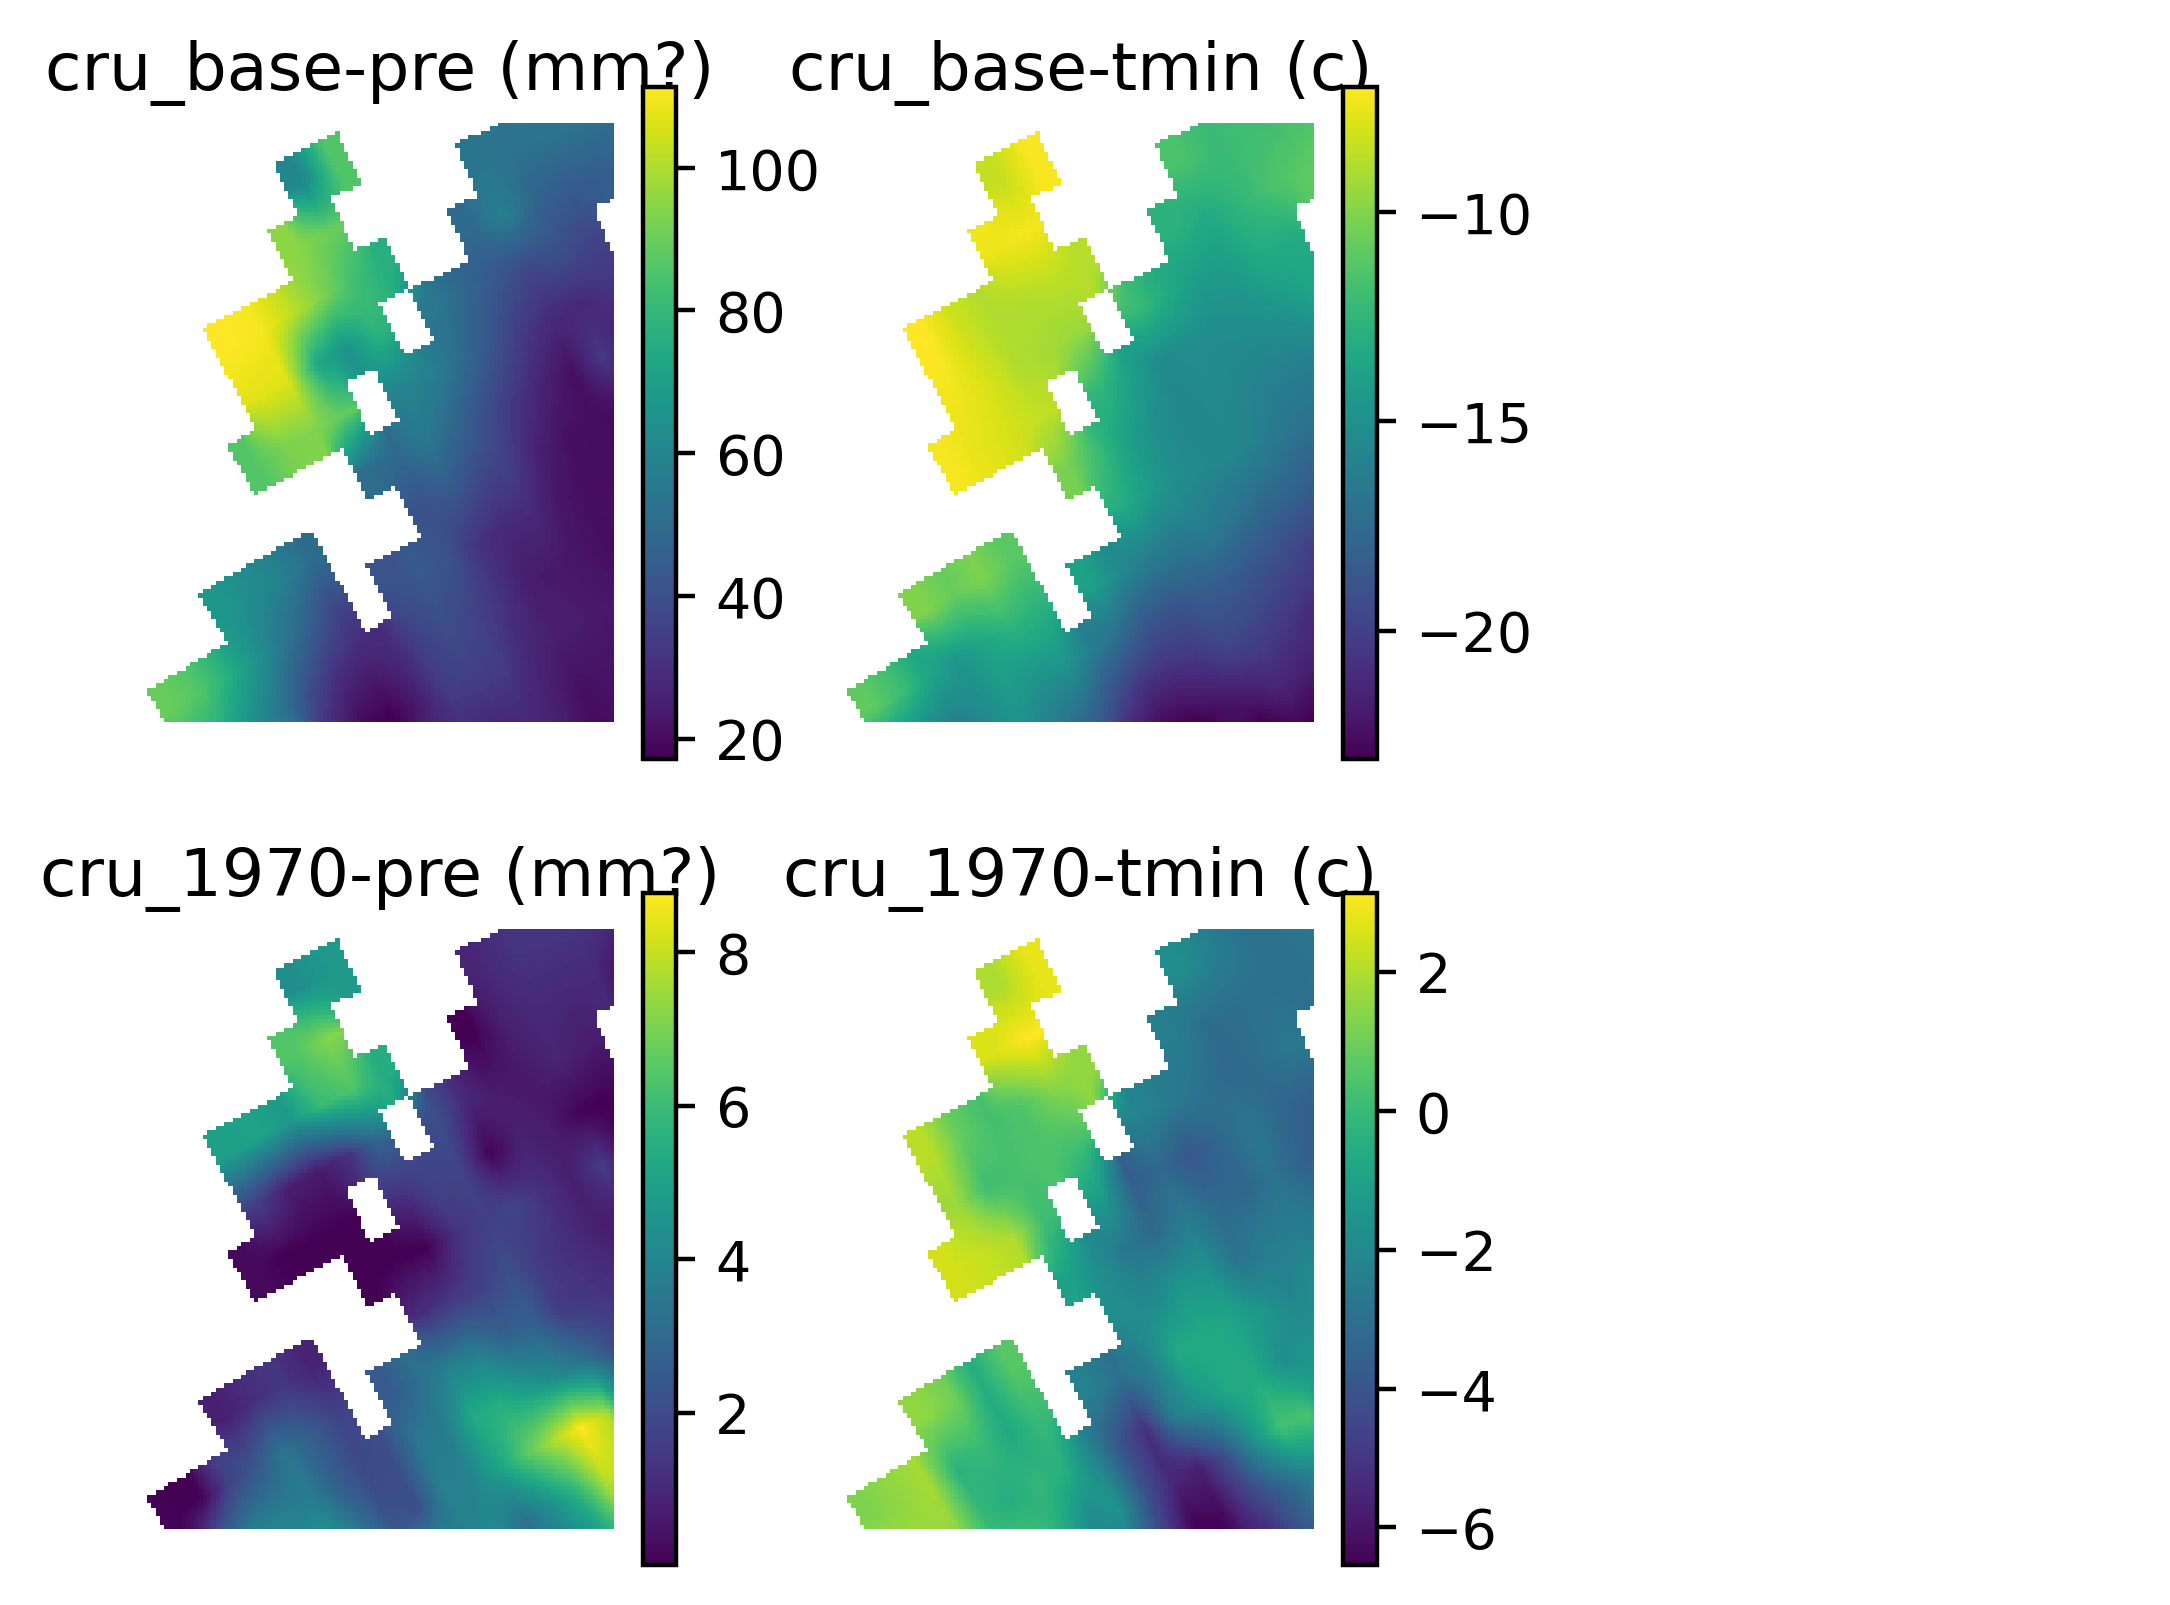

In [22]:
fig, axes= plt.subplots (2,3, dpi=400)

im = axes[0][0].imshow(mytile.data['cru_baseline']['pre'].data[0])
fig.colorbar(im, ax=axes[0][0])
axes[0][0].set_title('cru_base-pre (mm?)')

im = axes[0][1].imshow(mytile.data['cru_baseline']['tmin'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[0][1])
axes[0][1].set_title('cru_base-tmin (c)')

im = axes[1][0].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['pre'].data[0])
fig.colorbar(im, ax=axes[1][0])
axes[1][0].set_title('cru_1970-pre (mm?)')

im = axes[1][1].imshow(mytile.data['cru_AnnualTimeSeries'][1970].dataset['tmax'].data[0] - downscalers.ZERO_C_IN_K)
fig.colorbar(im, ax=axes[1][1])
axes[1][1].set_title('cru_1970-tmin (c)')


for xx in range(2):
    for yy in range(3):
        axes[xx][yy].axis('off')

plt.show()

In [23]:
variables = {
    'tmax': {'function': 'temperature', 'reference': 'tmax','baseline':'tmax', 'name': 'tmax'},
    'tmin': {'function': 'temperature', 'reference': 'tmin','baseline':'tmin', 'name': 'tmin'},
    'tavg': {'function': 'temperature', 'reference': 'tavg','baseline':'tmp', 'name': 'tavg'},
    'prec': {'function': 'precipitation', 'reference': 'prec','baseline':'pre', 'name': 'prec'},

    'vapo_pa': {
        'function': 'vapor-pressure', 
        'reference': 'vapr',
        'baseline-pres':'pres', 
        'baseline-spfh': 'spfh',
        'name': 'vapo'
        },
    'nirr': {
        'function': 'radiation', 
        'reference': 'srad',
        'baseline':'dswrf', 
        'name': 'nirr'
        
    },
    'ws': {
        'function': 'wind-speed', 
        'reference': 'wind',
        'baseline-ugrd': 'ugrd', 
        'baseline-vgrd': 'vgrd', 
        'name': 'ws'
        
    }
}
if not 'correction_factors' in mytile.data:
    mytile.calculate_correction_factors('cru_baseline', 'worldclim', variables)
    mytile.toggle_verbose()
    mytile.save('/media/rwspicer/data/V3/tem/03-tiles-testing', overwrite=True, items='correction_factors', update_manifest=True)
    mytile.toggle_verbose()

mytile.data['correction_factors']

Saving: correction_factors


<xarray.Dataset> Size: 5MB
Dimensions:  (y: 140, x: 109, time: 12)
Coordinates:
  * y        (y) float64 1kB 3.393e+06 3.389e+06 ... 2.841e+06 2.837e+06
  * x        (x) float64 872B -1.756e+06 -1.752e+06 ... -1.328e+06 -1.324e+06
  * time     (time) int64 96B 1 32 60 91 121 152 182 213 244 274 305 335
Data variables:
    tmax     (time, y, x) float32 732kB nan nan nan nan ... 2.24 2.524 2.394
    tmin     (time, y, x) float32 732kB nan nan nan ... -1.186 -0.6425 -0.6792
    tavg     (time, y, x) float32 732kB nan nan nan nan ... 3.029 3.487 3.436
    prec     (time, y, x) float32 732kB nan nan nan nan ... 0.9214 0.936 0.948
    vapo     (time, y, x) float32 732kB nan nan nan nan ... 1.678 1.6 1.604
    nirr     (time, y, x) float32 732kB nan nan nan ... 2.117e-05 2.112e-05
    ws       (time, y, x) float32 732kB nan nan nan nan ... 9.073 nan nan nan

In [24]:
variables = {
    'tmax': {'function': 'temperature', 'temperature': 'tmax','correction_factor':'tmax', 'name': 'tmax'},
    'tmin': {'function': 'temperature', 'temperature': 'tmin','correction_factor':'tmin', 'name': 'tmin'},
    'tavg': {'function': 'temperature', 'temperature': 'tmp','correction_factor':'tavg', 'name': 'tavg'},
    'prec': {'function': 'precipitation', 'precipitation': 'pre','correction_factor':'prec', 'name': 'prec'},
    'vapo': {'function': 'vapor-pressure', 'name': 'vapo', 'pres':'pres', 'spfh':'spfh', 'correction_factor': 'vapo' },
    'nirr': {'function':'radiation', 'name': 'nirr', 'dswrf':'dswrf','correction_factor': 'nirr'},
    'wind': {'function':'wind-speed', 'name': 'wind', 'ugrd': 'ugrd', 'vgrd':'vgrd', 'correction_factor':'ws'},
    'winddir': {'function':'wind-direction', 'name': 'winddir', 'ugrd': 'ugrd', 'vgrd':'vgrd' },
}

mytile.toggle_verbose()
mytile.downscale_timeseries('downscaled_cru', 'cru_AnnualTimeSeries','correction_factors', variables)
mytile.toggle_verbose()


Downscaling 1970
Downscaling 1971
Downscaling 1972
Downscaling 1973
Downscaling 1974
Downscaling 1975
Downscaling 1976
Downscaling 1977
Downscaling 1978
Downscaling 1979
Downscaling 1980
Downscaling 1981
Downscaling 1982
Downscaling 1983
Downscaling 1984
Downscaling 1985
Downscaling 1986
Downscaling 1987
Downscaling 1988
Downscaling 1989
Downscaling 1990
Downscaling 1991
Downscaling 1992
Downscaling 1993
Downscaling 1994
Downscaling 1995
Downscaling 1996
Downscaling 1997
Downscaling 1998
Downscaling 1999
Downscaling 2000
Downscaling 2001


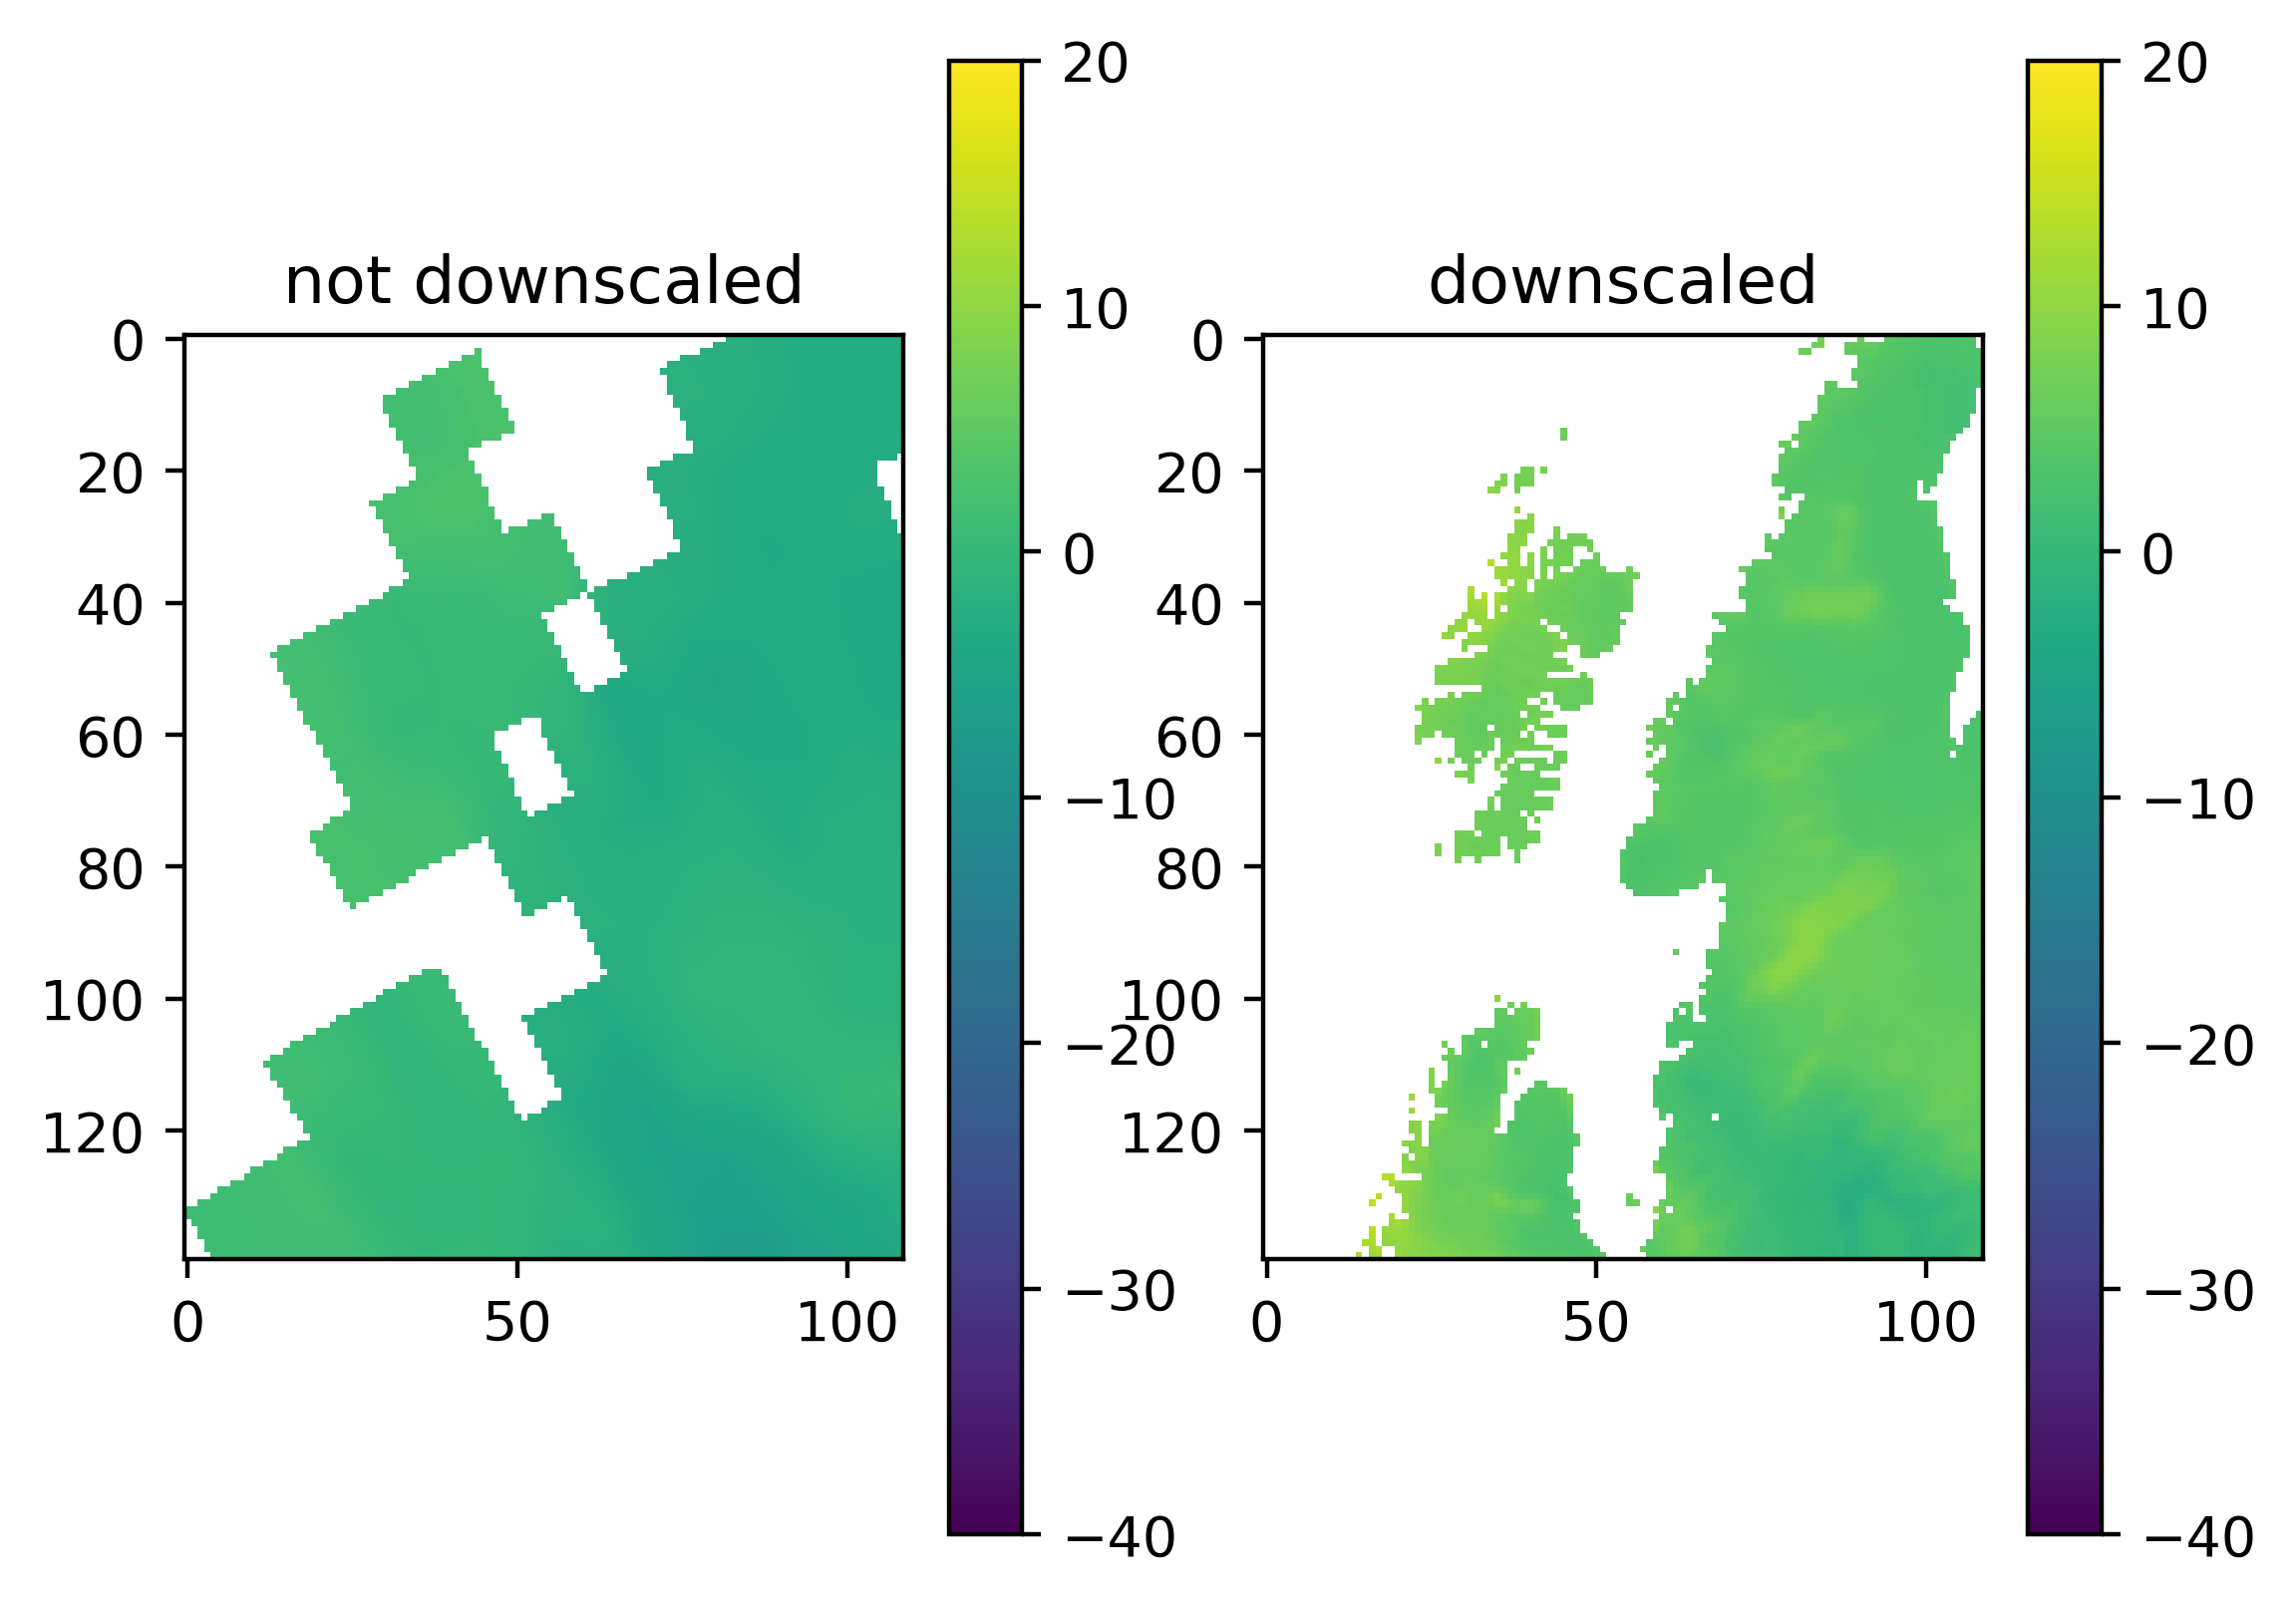

(np.float32(-2.834937), np.float32(13.815989))

In [25]:
year = 1970
day = 1 # 1 based
var = 'tmax'


not_downscaled = mytile.data['cru_AnnualTimeSeries'][year].dataset
downscaled = mytile.data['downscaled_cru'][year].dataset


fig, axes = plt.subplots(1,2, dpi=400)
axes[0].imshow(not_downscaled['tmax'].data[day-1] - corrections.ZERO_C_IN_K, vmin=-40, vmax=20)
axes[0].set_title('not downscaled')


im = axes[1].imshow(downscaled['tmax'].data[day-1], vmin=-40, vmax=20)
axes[1].set_title('downscaled')
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])



plt.show()

np.nanmin(downscaled['tmax'].data[day-1]), np.nanmax(downscaled['tmax'].data[day-1]), 